# Assignment 2 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Dimensionality Reduction`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified. Libraries allowed (Numpy, matplotlib)

## Datasets 
- The IIIT-CFW is database for the cartoon faces in the wild. The dataset contains 8928 annotated cartoon faces of famous personalities of the world with varying profession. Additional 1000 real faces of the public figure to study cross modal retrieval tasks, such as, Photo2Cartoon retrieval. Ref - https://cvit.iiit.ac.in/research/projects/cvit-projects/cartoonfaces
- We have sub sampled the following data for this assignment - Cartoon faces of 8 subjects and approx. 100 images for each subject. 

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q3.ipynb`.

In [ ]:
# Installing Pillow Libraries
!pip install scikit-learn matplotlib Pillow

In [ ]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image

## Load Data

In [ ]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [ ]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [ ]:
dirpath = './IIIT-CFW/'
X,Y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


In [ ]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

ind = np.random.randint(0,Y.shape[0],6)
display_images(X[ind,...],Y[ind], row=2,col=3)

## Dimensionality Reduction
- Plot eigen spectrum for the data.

Percentage of variance preserved is defined as the fraction of eigen values used. As we include more principal components to describe the data, the percentage of variances preserved under the dimensionality reduction increases. 

- Plot the percentage of variances vs the number of principal components to validate the above statement.
- Try visualizing these eigen vectors. Comment on what these ghost faces represent 
- Try reconstructing images with your choice of number of principal components and visualize the reconstructed image.

Let's define reconstruction error as the frobenius norm of the difference between original and reconstructed image. 

- Plot the number of principal components vs the corresponding reconstruction error for 5 selected number of principal components of your choice.
- Using the two dominant principal values, plot the data with colors showing the labels. What do you observe?


#### Write a function that gives eigen values and eigen vectors given data

In [ ]:
# # write function
# for x in X:
#   x=x.flatten()
#   print(x)
#   print(x.shape)
# # print(X.flatten())

def get_eigen(X):
  X = np.array([x.flatten() for x in X])
  # X= X.transpose()
  # x_means = np.mean( X , axis = 1)
  # for i in range(X.shape[0]):
  #   X[i]=X[i]-x_means[i]
  
  # X_T = X
  # X=X.transpose()
  covariance_mat = np.cov(X.transpose())
  value,vector = np.linalg.eigh(covariance_mat)
  value = value[::-1]
  value = np.absolute(value)
  vector = np.flip(vector, axis=1)
  return (X, value , vector )








# print(X.shape)



# print(X)







In [ ]:

# print(X_T)


# print(X)

In [ ]:


# covariance_mat = np.cov(X.transpose())



In [ ]:
# covariance_mat.shape

In [ ]:
X,value,vector = get_eigen(X)

In [ ]:
print(vector.shape)
print(value)
print(value)
print(vector)
print(vector)

(3072, 3072)
[8.05321772e+01 1.99819287e+01 1.29505097e+01 ... 1.12234657e-14
 1.24821432e-14 1.35926043e-14]
[8.05321772e+01 1.99819287e+01 1.29505097e+01 ... 1.12234657e-14
 1.24821432e-14 1.35926043e-14]
[[ 0.02292623 -0.02281108  0.00362127 ...  0.          0.
   0.        ]
 [ 0.02397955 -0.02519623  0.0062778  ... -0.04944144  0.02468653
  -0.02587292]
 [ 0.02493145 -0.02346326  0.00936172 ... -0.01195559 -0.17321181
  -0.18008751]
 ...
 [ 0.02018243 -0.01026555  0.02086738 ...  0.00627904 -0.03291425
   0.01873094]
 [ 0.02059623 -0.01334157  0.02756402 ...  0.00242342  0.03435376
  -0.01170415]
 [ 0.02169246 -0.01293336  0.0293959  ...  0.01818992  0.01350382
  -0.00254395]]
[[ 0.02292623 -0.02281108  0.00362127 ...  0.          0.
   0.        ]
 [ 0.02397955 -0.02519623  0.0062778  ... -0.04944144  0.02468653
  -0.02587292]
 [ 0.02493145 -0.02346326  0.00936172 ... -0.01195559 -0.17321181
  -0.18008751]
 ...
 [ 0.02018243 -0.01026555  0.02086738 ...  0.00627904 -0.03291425
   

#### Compute eigen values and plot eigen value spectrum

In [ ]:
# eigen values and spectrum

x = [i+1 for i in range(value.shape[0])]
# print(x)
x= np.array(x)

plt.plot(x,value)
plt.ylabel('Eigen Value')
plt.xlabel('PCA')
plt.grid()
plt.show()




#### Plot the percentage of variances vs the number of principal components

In [ ]:
def get_cumu(value):
  y = list()
  y.append(value[0])
  for i in range(1,value.shape[0]):
    cum_var = value[i] + y[i-1]
    y.append(cum_var)
  y = np.array(y)
  return y

In [ ]:
# plot variance vs components
total_var = np.sum(value)
cumu = get_cumu(value)
# print(x)
# print()
plt.plot(x,(value / total_var)*100 , label = 'Variance')

plt.plot(x , (cumu/total_var)*100 , label = 'cumulative')

plt.grid()
plt.show()

#### Visualize eigen faces(eigen vectors)

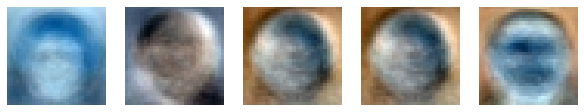

In [ ]:
"""
Use the below sample code to visualize the eigen faces and reconstructed images (can write your own function as well)
"""
eig_vecs = vector

def plot(image,H,W,C,indices):
    #indices = [randrange(100)+1 for i in range(5)]
    pl = np.reshape(image.T,(-1,H,W,C))
    plt.figure(figsize=(25,25))
    for c,i in enumerate(indices):
        ele = pl[i]
        minim = np.min(ele)
        maxim = np.max(ele)
        ele = (ele - minim) / (maxim - minim)
        ele = np.clip(ele,0,254)
        plt.subplot(1,12,c+1)
        plt.axis('off')
        plt.imshow(ele,cmap=plt.cm.gray)
    plt.show()

indices = [randrange(12)+1 for i in range(5)]
plot(eig_vecs,H,W,C, indices)


#### Reconstruction 

In [ ]:
def reconstruction(X , egv):
  egvec = egv @ egv.transpose()
  X_new = X @ egvec
  print(X_new.shape)
  X_new = np.array([temp.reshape(32,32,3) for temp in X_new])
  return X_new

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(672, 3072)


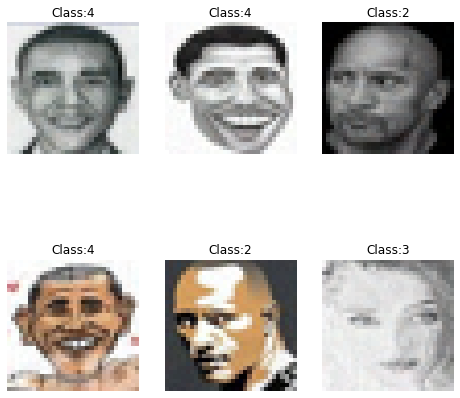

In [ ]:
X_ = reconstruction(X , eig_vecs[:,:700])
ind = np.random.randint(0,Y.shape[0],6)
display_images(X_[ind,...],Y[ind], row=2,col=3)

In [ ]:
def forb(images):
  sum=0
  for img in images:
    sum+=np.linalg.norm(img)
  return sum/images.shape[0]

f_orig = forb(X)
no_of_components = [2,50,120,500,1000]
rec_error = list()

for noc in no_of_components:
  X_ = reconstruction(X , eig_vecs[:,:noc])
  f_new = forb(X_)
  rec_error.append(f_orig - f_new)



(672, 3072)
(672, 3072)
(672, 3072)
(672, 3072)
(672, 3072)


In [ ]:
plt.plot(no_of_components,rec_error)
plt.xlabel('Componenets')
plt.ylabel('Reconstruction Error')
plt.show()

In [ ]:
# # reconstruction
# # print(X.shape)
# no_of_component = vector[: , :400]
# print(no_of_component.shape)
# print(X.shape)
# X_pca = X @ no_of_component

In [ ]:
# X_pca.shape

#### Plot data in 2D

(672, 2)


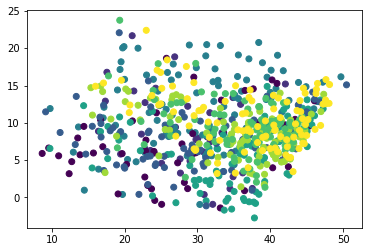

In [ ]:
# plot data in 2D
# X_pca =reconstruction(X,eig_vecs[:,:2])
X_pca = X @ eig_vecs[:,:2]
print(X_pca.shape)
# X_pca = np.array([temp.flatten() for temp in X_pca])
p1 = X_pca[:,0]
p2 = X_pca[:,1]
plt.scatter(p1,p2,c=Y)
plt.show() 

In this graph I can see that some classes have clearly visible clusters when data is plotted with first two dominant principal values.The first two components, at the very least, maintain a significant bit of the original dataset's variation, as the close proximity of similar photos of similar based on this plot. Therefore, good amount of data is preserved even when the number of components are less.

## Lets analyze the principal components classwise
- Visualize dominant eigen faces of each of the classes.
- Print the number of principal components required to retain 90% variance for each of the classes and for the entire dataset
- Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

Example output:
```
Number of principal components required for 90% reconstruction of the:
Entire Dataset = 10 
Amitabhbachan = 10
AamirKhan = 10
...
```

In [ ]:
# Load data again
X,Y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


In [ ]:
class_data = dict()

for i in range(Y.shape[0]):
  class_data.setdefault(Y[i] , [])
  class_data[Y[i]].append(X[i])

# print(type(class_data[Y[0]][0]))
  

In [ ]:
for key in class_data.keys():
  class_data[key] = np.array(class_data[key])

#### Visualize dominant eigen faces of each of the classes

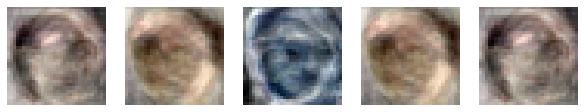

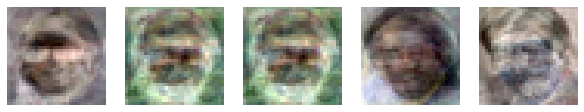

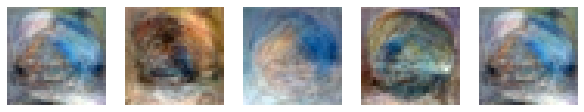

In [ ]:
# visualize
class_values = dict()
for key in class_data.keys():
  class_data[key] , val , vec = get_eigen(class_data[key])
  class_values[key] = val
  indices = [randrange(12)+1 for i in range(5)]
  plot(vec,H,W,C, indices) 

#### Number of principal components required to retain 90% variance for each of the classes and for the entire dataset

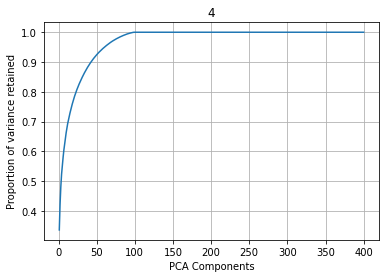

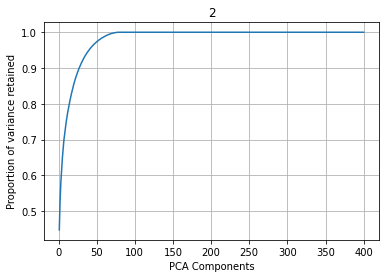

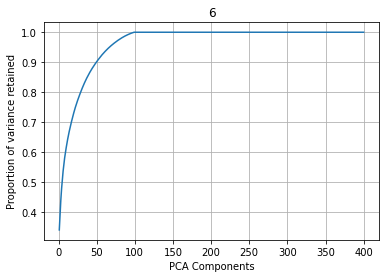

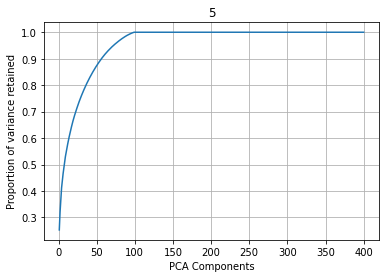

In [ ]:
# components required
for key in class_values.keys():
  y = get_cumu(class_values[key])
  t_var = np.sum(class_values[key])
  plt.plot(x[:400] , (y/t_var)[:400])
  plt.xlabel("PCA Components")
  plt.ylabel("Proportion of variance retained")
  plt.grid()
  plt.title(str(key))
  plt.show()


#### Analysis : Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

In [ ]:
# observation/analysis
var_90 = dict()
for key in class_values.keys():
  y = get_cumu(class_values[key])
  t_var = np.sum(class_values[key])
  y_n = y/t_var
  for i in range(y_n.shape[0]):
    if y_n[i]>=0.9:
      var_90[key] = i+1
      break
print(var_90)

total_var = np.sum(value)

cumu_n = cumu /total_var

no_of_component_req = 0

for i in range(cumu_n.shape[0]):
  if cumu_n[i] >= 0.9:
    no_of_component_req = i+1
    break

print(no_of_component_req)


{1: 24, 3: 36, 0: 21, 4: 43, 2: 28, 6: 50, 5: 57, 7: 44}
115


No, the number of components components needed to capture 90% of the variation in any class is less than the total number of components in the dataset.
It's due to the fact that a person's facial characteristics are comparable.
As a result, fewer principal components are needed to represent the majority of the data variance within a class.
This means that intra-class variation is lower than inter - class variance.

On the other hand, if we use PCA to analyse the complete dataset, we'll need a large enough number of principle components to differentiate class.
It takes more principle components to capture 90% of the variation of 8 classes than it does to capture 90% of the variance of class individually.

## Linear Regression (continued)
1. Perform linear regression on below datapoints
2. Use PCA for dimensionality reduction on this datapoints and then perform Linear regression.
3. Perform this experiment on different number of components and report the score for linear regression. Plot the graph of [1-200] principal components vs regression score. What do you observe?

Note :- Can use inbuilt functions for Linear Regression and PCA for this question

In [ ]:
# datapoints
X,Y = load_data(dirpath)
X = X.reshape((X.shape[0],-1))
label = np.array([randrange((32*32*3)) for i in range(5)])
label = np.mean(X[:,label], axis = 1)
print(label.shape)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)
(672,)


In [ ]:
# code here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score

components = [i+1 for i in range(200)]

scores = list()
for i in components:
  pca = PCA(n_components=i)
  X_pca = pca.fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(X_pca, label, test_size = 0.20)
  linear = LinearRegression()
  linear.fit(X_train, y_train)
  y_pred = linear.predict(X_test)
  # scores.append(linear.score(X_test, y_test))
  scores.append(r2_score(y_pred,y_test))
  


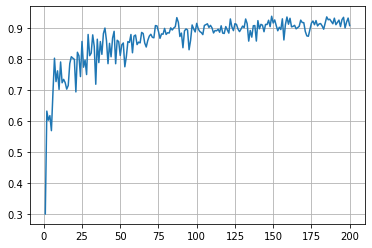

In [ ]:
# analysis / plot (split the cells if required)
x_axis = np.array(components)
y_axis = np.array(scores)
plt.plot(x_axis , y_axis )
plt.grid()
plt.show()

As shown in the graph above (variance retain graph), the variance captured increases exponentially as the number of components increases. With a number of components 115, 90% of the variance is captured. After that, the graph becomes nearly constant, with just a small increase in variance captured as the number of principal components increases.

The regression score is the same way. It increases exponentially at first until the majority of the variance is captured. After 115 we see that it stays within the same range and fluctuations are not that abrupt.

115 like we deduced above is the correct no. of principle component for 90% variance.